In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import openaq
import warnings
from numpy import median

api = openaq.OpenAQ()

resp = api.cities(df=True, limit=10000)

# display the first 10 rows
#resp.info()

resp

C:\Users\karla\anaconda3\envs\pp-proj2\lib\site-packages\openaq\decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


,country,name,city,count,locations
0,US,007,007,1372.0,5
1,US,019,019,704.0,1
2,US,037,037,2683.0,23
3,US,039,039,380.0,1
4,US,047,047,101.0,1
...,...,...,...,...,...
2910,CN,黔东南苗族侗族自治州,黔东南苗族侗族自治州,371477083.0,2
2911,CN,黔南布依族苗族自治州,黔南布依族苗族自治州,371969570.0,2
2912,CN,黔西南布依族苗族自治州,黔西南布依族苗族自治州,368439999.0,2
2913,CN,齐齐哈尔市,齐齐哈尔市,916311169.0,6


##### Population Analysis

In [3]:
population = pd.read_csv('C:/Users/karla/OneDrive/Escritorio/Python Programming/Project 2/pp-project-2-group-51-4/Data_measurements/Popn.csv')
population

,Year,London,Mexico city,Newcastle,UK,Mexico,Iceland
0,2021,9425622,21918936,813807,68207116,130262216,34335300
1,2020,9304016,21782378,809481,67886011,128932753,34124300
2,2019,9176530,21671908,805364,67530172,127575529,33903100
3,2018,9046485,21580828,801494,67141684,126190788,33671300
4,2017,8916251,21500252,797774,66727461,124777324,33439300
5,2016,8787892,21419976,794072,66297944,123333376,33220600
6,2015,8661381,21339780,790387,65860146,121858258,33024300


In [9]:
population= population.iloc[0:3, 0:3]
population["Year"] = population["Year"].map(str)

# change to numeric 
population["London"] = pd.to_numeric(population["London"])
population["Mexico city"] = pd.to_numeric(population["Mexico city"])

# divide columns 
population['Pop_Lon'] = (population['London']/1000000)
population['Pop_Mex'] = (population['Mexico city']/1000000)

population

,Year,London,Mexico city,Pop_Lon,Pop_Mex
0,2021,9425622,21918936,9.425622,21.918936
1,2020,9304016,21782378,9.304016,21.782378
2,2019,9176530,21671908,9.176530,21.671908


##### Pollution Analysis

In [5]:
pollution_lon = pd.read_csv('C:/Users/karla/OneDrive/Escritorio/Python Programming/Project 2/pp-project-2-group-51-4/Data_measurements/London.csv')
pollution_lon

pollution_mex = pd.read_csv('C:/Users/karla/OneDrive/Escritorio/Python Programming/Project 2/pp-project-2-group-51-4/Data_measurements/MEXICO STATE.csv')
pollution_mex

,ID,Date,pm10_mean,pm25_mean,pm10_max,pm25_max,pm10_min,pm25_min
0,0,2020-10-05,45.333333,19.062500,154.0,36.0,1.0,7.0
1,1,2020-10-06,40.351145,19.365854,142.0,36.0,7.0,1.0
2,2,2020-10-07,44.153153,19.342857,117.0,36.0,6.0,9.0
3,3,2020-10-08,40.590909,17.827586,100.0,37.0,3.0,5.0
4,4,2020-10-09,38.810606,18.533333,121.0,44.0,4.0,1.0
...,...,...,...,...,...,...,...,...
180,180,2021-09-26,33.456522,20.345679,90.0,65.0,3.0,2.0
181,181,2021-09-27,27.280899,10.531646,90.0,43.0,3.0,1.0
182,182,2021-09-28,35.434146,16.819149,111.0,43.0,2.0,3.0
183,183,2021-09-29,41.270936,23.946237,120.0,47.0,1.0,8.0


##### GDP Analysis

In [6]:
GDPPerCap = pd.read_csv('C:/Users/karla/OneDrive/Escritorio/Python Programming/Project 2/pp-project-2-group-51-4/Data_measurements/GDPPerCap.csv')
GDPPerCap

,Year,United Kingdom,Mexico,Iceland
0,2021,1397.59480,345.230541,1414.98227
1,2020,1472.38571,363.393271,1418.12587
2,2019,1525.77585,378.153495,1562.23073
3,2018,1613.45688,409.045570,1831.70566
4,2017,1748.28812,469.476137,2297.92064
5,2016,1873.56777,494.970261,2723.52095
6,2015,1986.74716,534.273631,3215.69418


In [8]:
GDPPerCap= GDPPerCap.iloc[0:3, 0:3]
GDPPerCap["Year"] = GDPPerCap["Year"].map(str)

# change to numeric 
GDPPerCap["United Kingdom"] = pd.to_numeric(GDPPerCap["United Kingdom"])
GDPPerCap["Mexico"] = pd.to_numeric(GDPPerCap["Mexico"])

GDPPerCap

,Year,United Kingdom,Mexico
0,2021,1397.59480,345.230541
1,2020,1472.38571,363.393271
2,2019,1525.77585,378.153495


##### Plot Analysis

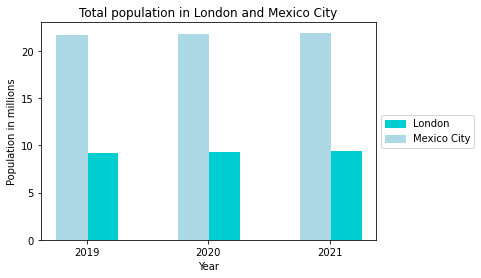

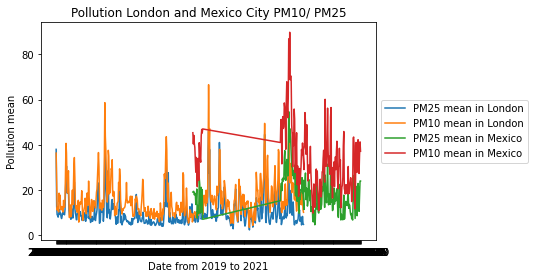

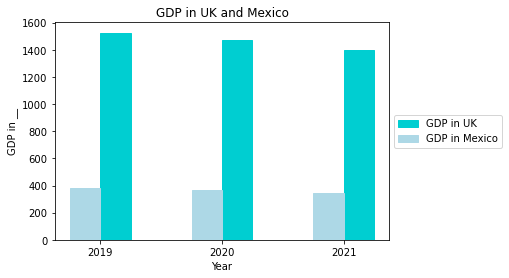

In [41]:
import numpy as np
import matplotlib.pyplot as plt
############################ POPULATION ############################## 
n=3
r = np.arange(n)
width = 0.25
  
plt.bar(r, population['Pop_Lon'], color = 'darkturquoise',
        width = width, edgecolor = 'darkturquoise',
        label='London')
plt.bar(r + width, population['Pop_Mex'], color = 'lightblue',
        width = width, edgecolor = 'lightblue',
        label='Mexico City')
  
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.title("Total population in London and Mexico City")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['2021','2020','2019'])
plt.legend()
plt.gca().invert_xaxis()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
plt.show()

############################ POLLUTION ############################## 

plt.plot(pollution_lon["Date"], pollution_lon['pm25_mean'], label='PM25 mean in London')
plt.plot(pollution_lon["Date"], pollution_lon['pm10_mean'], label='PM10 mean in London')

plt.plot(pollution_mex["Date"], pollution_mex['pm25_mean'], label='PM25 mean in Mexico')
plt.plot(pollution_mex["Date"], pollution_mex['pm10_mean'], label='PM10 mean in Mexico');

plt.xlabel("Date from 2019 to 2021")
plt.ylabel("Pollution mean")
plt.title("Pollution London and Mexico City PM10/ PM25")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

plt.show()

############################ GDP ############################## 
n=3
r = np.arange(n)
width = 0.25
  
plt.bar(r, GDPPerCap["United Kingdom"], color = 'darkturquoise',
        width = width, edgecolor = 'darkturquoise',
        label='GDP in UK')
plt.bar(r + width, GDPPerCap['Mexico'], color = 'lightblue',
        width = width, edgecolor = 'lightblue',
        label='GDP in Mexico')
  
plt.xlabel("Year")
plt.ylabel("GDP in __")
plt.title("GDP in UK and Mexico")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['2021','2020','2019'])
plt.legend()
plt.gca().invert_xaxis()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.show()